## Step 1: Load Required Libraries
We begin by importing necessary Python libraries such as:
- `numpy` and `pandas` for data manipulation
- `matplotlib` and `seaborn` for visualization
- `sklearn` for dataset loading, preprocessing, model implementation, and evaluation.


In [2]:
#Load Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Step 2: Load and Preprocess the Dataset
### Actions:
1. Load the California Housing dataset using `fetch_california_housing()`
2. Convert the dataset into a Pandas DataFrame for easier handling.
3. Check for missing values.
4. Scale the features using `StandardScaler()` to standardize data distribution.


In [24]:
# Load dataset

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target  # Add target column
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [25]:
# Check for missing values

print("Missing values:", df.isnull().sum().sum())

Missing values: 0


In [27]:
# Feature scaling

# Initialize scaler
scaler = StandardScaler()

# Scale the features (excluding the target column)
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Target'])), columns=df.columns[:-1])

# Add the scaled target column separately (optional)
df_scaled['Target'] = df['Target']  # Keeping the target unscaled for interpretation


# Display the first few rows of the scaled DataFrame
print(df_scaled.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  Target  
0  -1.327835   4.526  
1  -1.322844   3.585  
2  -1.332827   3.521  
3  -1.337818   3.413  
4  -1.337818   3.422  


## Step 3: Split Data into Training & Testing Sets
### Actions:
- Define features (`X`) and target variable (`y`).
- Split the dataset into **80% training and 20% testing** using `train_test_split()`.


In [28]:
# Split Data into Training & Testing Sets

# Define features (X) and target variable (y)
X = df_scaled.drop(columns=['Target'])  # Features
y = df_scaled['Target']  # Target variable

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of datasets
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (16512, 8), (16512,)
Testing data shape: (4128, 8), (4128,)


## Step 4: Implement Regression Models
### Actions:
- Define and initialize multiple regression models:
  - **Linear Regression**
  - **Decision Tree Regressor**
  - **Random Forest Regressor**
  - **Gradient Boosting Regressor**
  - **Support Vector Regressor (SVR)**
- Train each model using the `fit()` function.


In [45]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}
# Train models
trained_models = {}  # Dictionary to store trained models
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model
    trained_models[name] = model  # Store trained model


## Step 5: Make Predictions
### Actions:
- Predict housing prices using trained models.
- Store predictions for evaluation.


In [46]:
# Store predictions
predictions = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)  # Predict values
    predictions[name] = y_pred  # Store predictions

# Display sample predictions for Linear Regression
print("Sample Predictions - Linear Regression:")
print(predictions["Linear Regression"][:10])

Sample Predictions - Linear Regression:
[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725 2.01175367
 2.64550005 2.16875532 2.74074644 3.91561473]


## Step 6: Evaluate Model Performance
### Actions:
- Compute **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **R² Score**.
- Compare results for each model.


In [47]:
# Compute performance metrics (MSE, MAE, R² Score)
results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "MAE": mae, "R² Score": r2}

# Convert results into a DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)


                                  MSE       MAE  R² Score
Linear Regression            0.555892  0.533200  0.575788
Decision Tree Regressor      0.498307  0.454555  0.619732
Random Forest Regressor      0.254266  0.326914  0.805965
Gradient Boosting Regressor  0.294080  0.371723  0.775581
Support Vector Regressor     0.355198  0.397763  0.728941


## Step 7: Compare Model Performances
### Actions:
- Visualize model performance using bar plots.
- Identify best and worst-performing models.


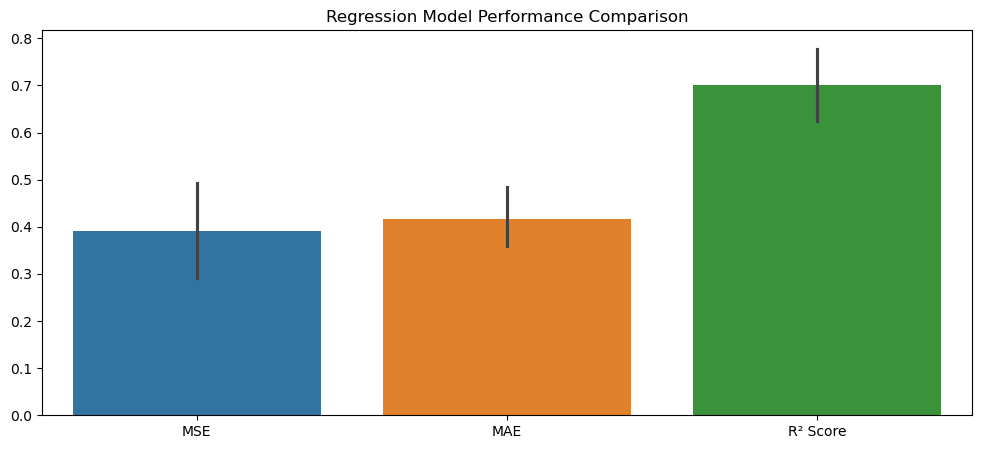

In [41]:
# Visualize performance comparison using bar plots
plt.figure(figsize=(12, 5))
sns.barplot(data=results_df)
plt.xticks(rotation=0)
plt.title("Regression Model Performance Comparison")
plt.show()


In [43]:
# Identify best and worst performing models
best_model = results_df.idxmax()["R² Score"]
worst_model = results_df.idxmin()["R² Score"]

print(f" Best Performing Model: {best_model}")
print(f" Worst Performing Model: {worst_model}")


 Best Performing Model: Random Forest Regressor
 Worst Performing Model: Linear Regression
